In [1]:
#http://www.tensorfly.cn/tfdoc/get_started/introduction.html

import tensorflow as tf
import numpy as np



#data
multiplying=3
x_data=np.float32(np.random.rand(2,100))*multiplying
y_data=np.dot([0.5,2],x_data)+1

#构造模型
b=tf.Variable(tf.zeros([1]))
W=tf.Variable(tf.random_uniform([1,2],-1.0,1.0))
y=tf.matmul(W,x_data)+b

x_data.shape,y_data.shape,b,W

((2, 100),
 (100,),
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(1, 2) dtype=float32_ref>)

In [162]:
#最小化方差
loss=tf.reduce_mean(tf.square(y-y_data))
optimizer=tf.train.GradientDescentOptimizer(0.1)
train=optimizer.minimize(loss)
train

<tf.Operation 'GradientDescent_14' type=NoOp>

In [163]:
#初始化变量
init=tf.initialize_all_variables()
#启动图
sess=tf.Session()
sess.run(init)

In [164]:
#拟合平面
for step in range(0,500):
    sess.run(train)
    if step % 20 ==0:
        weights=sess.run(W)
        bias=sess.run(b)
#         print(step,weights,bias)
        
weights,bias

(array([[0.49999934, 1.9999993 ]], dtype=float32),
 array([1.0000023], dtype=float32))

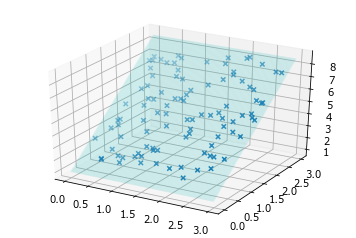

In [169]:
#可视化
#https://matplotlib.org/tutorials/toolkits/mplot3d.html#sphx-glr-tutorials-toolkits-mplot3d-py
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x_data[0],x_data[1],y_data,marker='x')

x_indexs=np.arange(0,multiplying,0.01)
y_indexs=x_indexs
X,Y=np.meshgrid(x_indexs,y_indexs)
z_values=x_indexs*weights[0][0]+y_indexs*weights[0][1]+np.full(y_indexs.shape,bias)
ax.plot(X,Y,z_values,alpha=0.05,c='c')

plt.show()